<a href="https://colab.research.google.com/github/EthicalFlipper/MachineLearning/blob/main/ConvolutionalNetworkForCIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

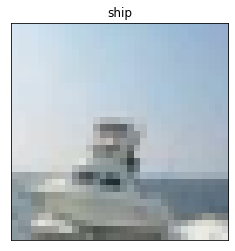

min max value in image 30 242
(50000, 32, 32, 3)
(10000, 32, 32, 3)


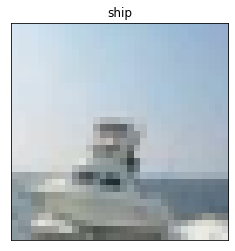

min max value in image 0.11764706 0.9490196


In [ ]:
#Keras to create the neural network
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras import backend as K
import numpy as np
#Matplotlib to plot info to show our results
import matplotlib.pyplot as plt
%matplotlib inline

img_rows, img_cols = 32, 32 #Variables to help keep track of image size (32 by 32 pixels)
num_classes = 10 #Output classes
input_shape = (img_rows, img_cols, 3) #Keep track of what shape the data is

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data() #This line will load data to train the model, and data to test it, as well as the labels to test the data
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = cifar10.load_data() #This line will load data to train the model, and data to test it, as well as the labels to test the data (backup)

label_names= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] #Array of labels
train_labels_backup = [item for sublist in train_labels_backup for item in sublist] #Convert the label arrays
test_labels_backup = [item for sublist in test_labels_backup for item in sublist] #Convert the label arrays

#Helper functions
def show_min_max(array, i): #Array = train_images, i = 100
  random_image = array[i] #Pick random image out of 100
  print("min max value in image", random_image.min(), random_image.max())

def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(str(label_names[labels[i]]))
  plt.xticks([])
  plt.yticks([])
  plt.show() #Show the image

plot_image(train_images, 100, train_labels_backup) #Call plot_image function and pass it train_images, 100, test_images
show_min_max(train_images, 100) #Print out the 100th image

# Print out the shape of the train and test images to make sure it matches the expectations
print(train_images.shape) 
print(test_images.shape)

train_images = train_images.astype('float32') #Convert data into float32
test_images = test_images.astype('float32') #Convert data into float32

train_images /= 255 #Divide by 255 so each pixel is stored by value 0-1
test_images /= 255 #Divide by 255 so each pixel is stored by value 0-1

#Print out the image and min/max values again to make sure it is normalized
plot_image(train_images, 100, train_labels_backup)
show_min_max(train_images, 100)

train_labels = keras.utils.to_categorical(train_labels, num_classes) #Employ one-hot encoding on your data. One-hot encoding makes the network view each number independently
test_labels = keras.utils.to_categorical(test_labels, num_classes) #Employ one-hot encoding on your data.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
#Number of epochs
epochs = 20
#Batch size
batch_size = 64
#Model
model = Sequential()

#Convolutional layer with 32, 3x3 pixel filters
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape))
#Convolutional layer with 64 filters
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
#Pooling layer - condense the information the network has learned so far
model.add(MaxPooling2D(pool_size = (2, 2)))
#Dropout layer - so network doesn't get too dependent or specific
model.add(Dropout(rate = 0.2))
#Batch normalization layer - Batch normalization helps to keep each layer on the right track and working towards the desired goal
model.add(BatchNormalization())

#Convolutional Layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
#Pooling Layer
model.add(MaxPooling2D(pool_size = (1, 1)))
#Dropout Layer
model.add(Dropout(rate = 0.3))
#Batch Normalization layer
model.add(BatchNormalization())

#Convolutional Layer
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
#Final Convolutional Layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
#Final Pooling Layer
model.add(MaxPooling2D(pool_size = (1, 1)))
#Final Dropout Layer
model.add(Dropout(rate = 0.3))
#Final Batch Normalization Layer
model.add(BatchNormalization())

#Flatten Layer - start to prepare the network to produce output
model.add(Flatten())
#Dense Layer
model.add(Dense(units = 128, activation = 'relu'))
#Output Layer
model.add(Dense(units = num_classes, activation = 'softmax'))
#Summary
model.summary()
#Compile
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = 'adam', metrics = ['accuracy'])
#Fit
model.fit(train_images, train_labels, batch_size = batch_size, epochs = epochs, validation_data = (test_images, test_labels), shuffle = True)
#Evaluate
scores = model.evaluate(test_images, test_labels, verbose = 0) 
print('Test accuracy:', scores[1])
#Save
model.save('cifar_model.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 64)       